<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/f1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)

len(x_test)

x_train[0].shape

11490434/11490434 [==============================] - 1s 0us/step


(28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

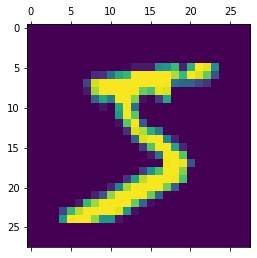

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

5

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4641 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3032 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9262


In [14]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9256


[0.2683478891849518, 0.925599992275238]

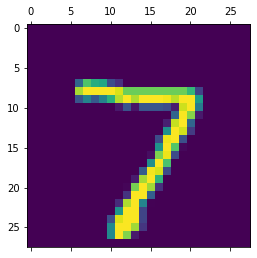

In [15]:
plt.matshow(x_test[0])

In [16]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 1ms/step


array([2.51653045e-02, 2.17357211e-07, 4.56147566e-02, 9.56257164e-01,
       1.76067080e-03, 1.02140926e-01, 3.33828143e-06, 9.99794245e-01,
       1.28287837e-01, 6.10036850e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    9,  928,   15,    6,    2,   13,    8,   42,    4],
       [   4,    0,   18,  917,    0,   24,    4,    9,   27,    7],
       [   1,    1,    2,    2,  895,    0,   16,    4,   12,   49],
       [   8,    3,    1,   32,    7,  771,   19,    4,   39,    8],
       [  11,    3,    5,    1,    7,   10,  917,    2,    2,    0],
       [   1,    5,   26,    6,    4,    0,    0,  943,    4,   39],
       [   6,    7,    6,   16,    9,   20,   10,    7,  887,    6],
       [  10,    7,    1,   10,   19,    5,    0,   18,   12,  927]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

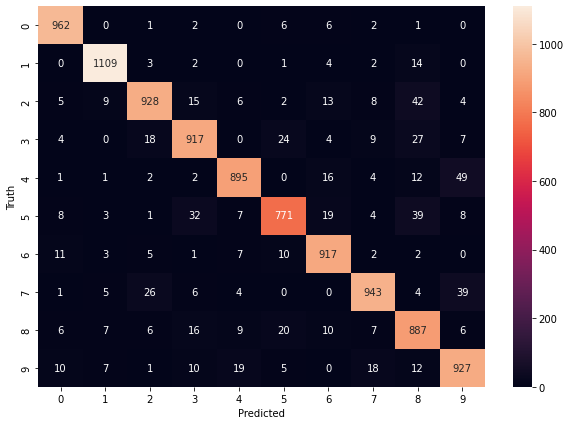

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2663 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1242 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0860 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9840


In [22]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9749


[0.08227259665727615, 0.9749000072479248]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

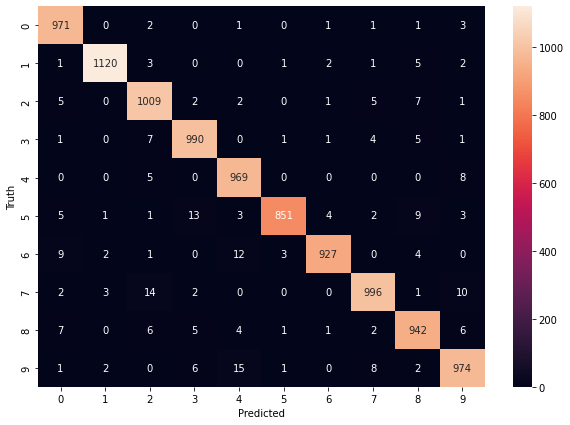

In [23]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [1]:
# model.fit(x_train_flattened, y_train, epochs=5)

In [25]:

def f1_score(y_true, y_pred):
    """Computes the F1 score"""
    true_positives = tf.math.count_nonzero(y_pred * y_true, dtype=tf.float32)
    false_positives = tf.math.count_nonzero(y_pred * (y_true - 1), dtype=tf.float32)
    false_negatives = tf.math.count_nonzero((y_pred - 1) * y_true, dtype=tf.float32)
    
    precision = true_positives / (true_positives + false_positives + 1e-8)
    recall = true_positives / (true_positives + false_negatives + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    
    return f1, precision, recall


In [29]:
y_true = tf.constant([1, 0, 1, 0])
y_pred = tf.constant([1, 1, 0, 1])

f1, precision, recall = f1_score(y_true, y_pred)

print("F1 score:", f1.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())


F1 score: 0.4
Precision: 0.33333334
Recall: 0.5


F1 score: tf.Tensor(0.6666667, shape=(), dtype=float32)
Precision: tf.Tensor(0.6666667, shape=(), dtype=float32)
Recall: tf.Tensor(0.6666667, shape=(), dtype=float32)
              precision    recall  f1-score   support

     class 0       0.50      0.50      0.50         2
     class 1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

